In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('dataset.csv')
df['email'].values

array(['URL: http://www.newsisfree.com/click/-1,8171676,1440/\n\nDate: Not supplied\n\n\n\nDetailed guidelines for vaccinating all 288 million citizens within five days \n\nof an outbreak are being dispatched to every state\n\n\n\n\n',
       'On Thu, 19 Sep 2002, Bill Stoddard wrote:\n\n--]How likely are you to change someone\'s mind by being\n\n--]rude and disrespectful to them? Is this how to win friends and influence\n\n--]people?\n\n\n\nPoint the first, I doubt if they are trying to change Rumsy\'s mind but\n\nrather to show others that there is a vocal and violent opposition to his\n\nviews. With such flagrant showings of opposition there would be more\n\ncoverage of the opposing ideas and thus the spreading of the dissenting\n\nmeme. A viri need not comply with the wishes of the attacked host, rather\n\nthe host had better make some antibodies or learn to adapt.\n\n\n\nPoint the second. Historicaly the "in yer face" mode of confrontation has\n\nbeen used to gain popular support 

In [3]:
df.sample(10)

,email,category
3139,"<HTML><FONT SIZE=2 PTSIZE=10 FAMILY=""SANSSERI...",spam
2639,This is a multi-part message in MIME format.\n...,spam
2771,"As seen on NBC, CBS, CNN, and even Oprah! The ...",spam
2149,Are you interested in making some extra money ...,spam
3347,"<html>\n\n<head>\n\n<meta http-equiv=""Content-...",spam
1733,If you're an ISP or running a good size mail s...,not-spam
94,\n\n> quickie for shell scripters:\n\n> How do...,not-spam
1601,"Greetings ...\n\n\n\n> PS: Yup, I'm back from ...",not-spam
2919,"Hi There,\n\n\n\nI recently came across a copy...",spam
2514,To: yyyy@netnoteinc.com\n\n###################...,spam


In [4]:
df.isnull().sum()

email       0
category    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   email     3796 non-null   object
 1   category  3796 non-null   object
dtypes: object(2)
memory usage: 59.4+ KB


In [6]:
df[df.duplicated()]

,email,category
659,URL: http://www.askbjoernhansen.com/archives/2...,not-spam
827,URL: http://www.askbjoernhansen.com/archives/2...,not-spam
1124,URL: http://www.askbjoernhansen.com/archives/2...,not-spam
1195,I think that this and other articles confuse S...,not-spam
1393,URL: http://www.askbjoernhansen.com/archives/2...,not-spam
...,...,...
3761,<html>\n\n\n\n\n\n<HEAD> \n\n<META charset=3DU...,spam
3779,\n\nHave tax problems? Do you owe the IRS mone...,spam
3786,"<html>\n\n\n\n<head>\n\n<meta http-equiv=3D""Co...",spam
3787,<html>\n\n<HEAD> \n\n<TITLE>creditfix</TITLE> ...,spam


In [7]:
df[df.duplicated("email", keep=False)]
df=df.drop_duplicates(keep='first')

In [8]:
df['category'].values[659]

'not-spam'

In [9]:
df['category'].values[827]

'not-spam'

In [10]:
df['category'].values[117]

'not-spam'

In [11]:
df.describe()

,email,category
count,3654,3654
unique,3654,2
top,<HTML><HEAD></HEAD><BODY><b><FONT SIZE=3D4>In ...,not-spam
freq,1,1891


In [12]:
df['category'].value_counts()

category
not-spam    1891
spam        1763
Name: count, dtype: int64

<Axes: ylabel='count'>

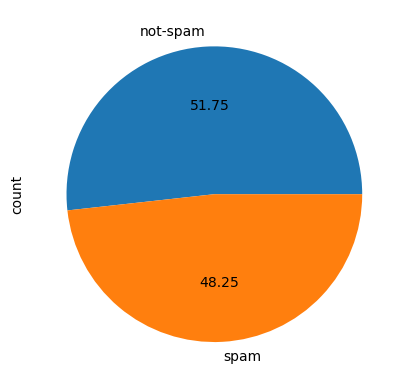

In [13]:
df['category'].value_counts().plot(kind='pie',autopct='%.2f')

In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()


In [15]:
df['category']=encoder.fit_transform(df['category'])

In [16]:
df.head()

,email,category
0,"URL: http://www.newsisfree.com/click/-1,817167...",0
1,"On Thu, 19 Sep 2002, Bill Stoddard wrote:\n\n-...",0
2,Dan Kohn <dan@dankohn.com> writes:\n\n\n\n> Gu...,0
3,wintermute wrote:\n\n>>Anyone know where in Ir...,0
4,"I attended the same conference, and was impres...",0


In [17]:
df['category'].values[117]

np.int64(0)

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [20]:
import nltk

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
nltk.download("punkt_tab")


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [23]:
df['num_characters']=df['email'].apply(len)
df.head()

,email,category,num_characters
0,"URL: http://www.newsisfree.com/click/-1,817167...",0,212
1,"On Thu, 19 Sep 2002, Bill Stoddard wrote:\n\n-...",0,1597
2,Dan Kohn <dan@dankohn.com> writes:\n\n\n\n> Gu...,0,2710
3,wintermute wrote:\n\n>>Anyone know where in Ir...,0,851
4,"I attended the same conference, and was impres...",0,2645


In [24]:
df['num_words']=df['email'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,email,category,num_characters,num_words
0,"URL: http://www.newsisfree.com/click/-1,817167...",0,212,29
1,"On Thu, 19 Sep 2002, Bill Stoddard wrote:\n\n-...",0,1597,319
2,Dan Kohn <dan@dankohn.com> writes:\n\n\n\n> Gu...,0,2710,527
3,wintermute wrote:\n\n>>Anyone know where in Ir...,0,851,186
4,"I attended the same conference, and was impres...",0,2645,495


In [25]:
df['num_sen']=df['email'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,email,category,num_characters,num_words,num_sen
0,"URL: http://www.newsisfree.com/click/-1,817167...",0,212,29,1
1,"On Thu, 19 Sep 2002, Bill Stoddard wrote:\n\n-...",0,1597,319,17
2,Dan Kohn <dan@dankohn.com> writes:\n\n\n\n> Gu...,0,2710,527,19
3,wintermute wrote:\n\n>>Anyone know where in Ir...,0,851,186,6
4,"I attended the same conference, and was impres...",0,2645,495,10


In [26]:
df[['num_characters','num_words','num_sen']].describe()

,num_characters,num_words,num_sen
count,3654.000000,3654.000000,3654.000000
mean,3413.334154,643.019704,14.130268
std,8300.199906,1209.972340,31.209587
min,36.000000,2.000000,1.000000
25%,741.000000,129.000000,4.000000
50%,1391.500000,263.000000,8.000000
75%,3248.500000,646.000000,14.000000
max,234358.000000,18463.000000,809.000000


In [27]:
df[df['category']==0][['num_characters','num_words','num_sen']].describe()


,num_characters,num_words,num_sen
count,1891.000000,1891.00000,1891.000000
mean,1632.056584,309.17028,11.997885
std,4454.697593,788.02789,30.172169
min,54.000000,9.00000,1.000000
25%,515.500000,96.00000,4.000000
50%,995.000000,191.00000,8.000000
75%,1620.000000,318.50000,13.000000
max,110372.000000,17337.00000,809.000000


In [28]:
df[df['category']==1][['num_characters','num_words','num_sen']].describe()


,num_characters,num_words,num_sen
count,1763.000000,1763.000000,1763.000000
mean,5323.938741,1001.107771,16.417470
std,10699.851665,1456.446588,32.136916
min,36.000000,2.000000,1.000000
25%,1139.500000,190.000000,4.000000
50%,2578.000000,535.000000,8.000000
75%,5816.000000,1251.500000,16.000000
max,234358.000000,18463.000000,408.000000


<Axes: xlabel='num_characters', ylabel='Count'>

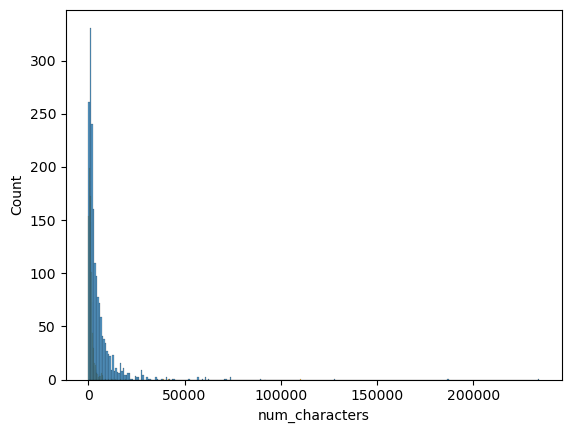

In [29]:
sns.histplot(df[df['category']==0]['num_characters'],color='orange')
sns.histplot(df[df['category']==1]['num_characters'])

<Axes: xlabel='num_characters', ylabel='Count'>

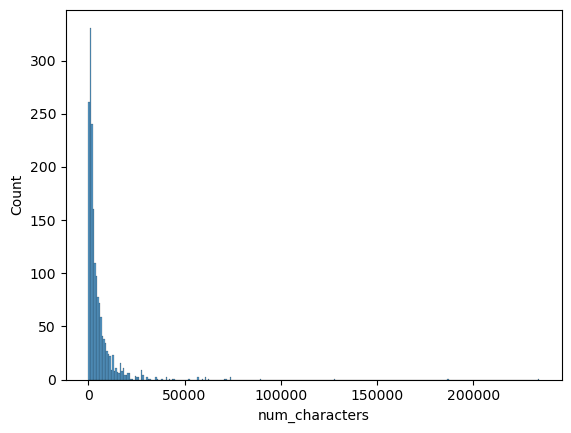

In [30]:
sns.histplot(df[df['category']==1]['num_characters'])

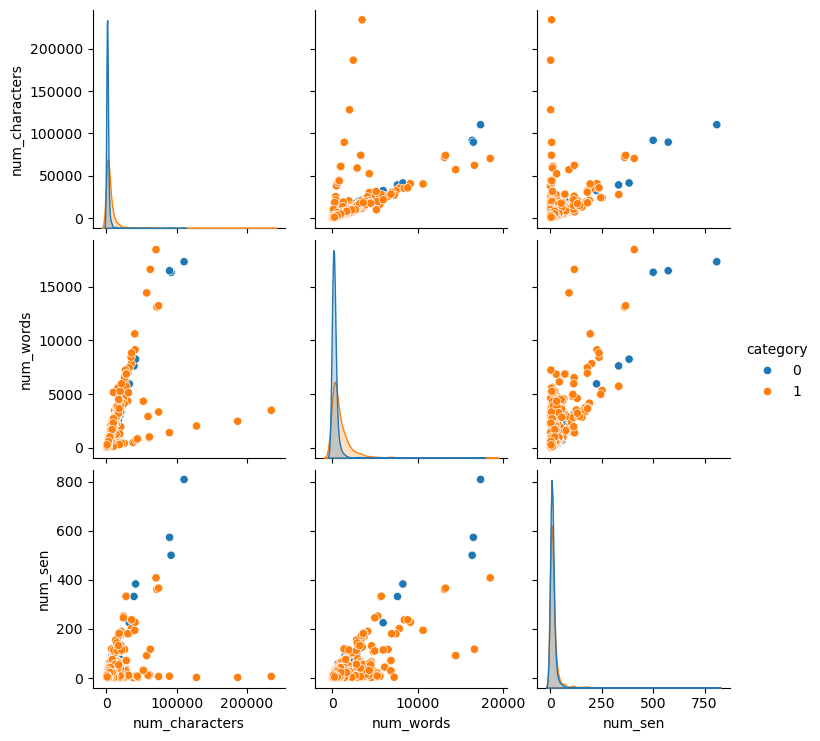

In [31]:
sns.pairplot(df,hue='category')

In [32]:
si = df.drop("email", axis=1)


<Axes: >

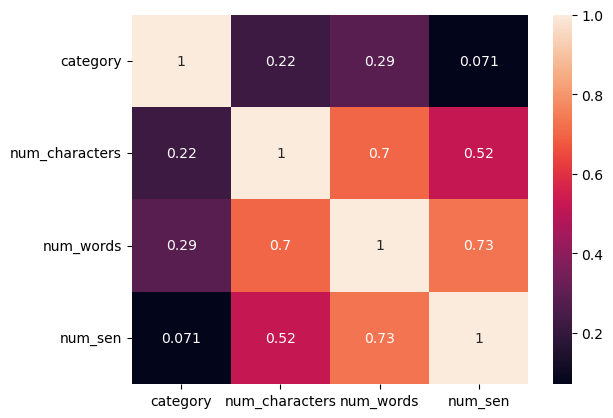

In [33]:
sns.heatmap(si.corr(numeric_only=True),annot=True)

In [34]:
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
# def transform_text(text):
#     text=text.lower()
#     text=nltk.word_tokenize(text)
#     y=[]
#     for i in text:
#         if i.isalnum():
#             y.append(i)
#     text=y[:]
#     y.clear()
#     for i in text:
#         if i not in stopwords.words('english') and i not in string.punctuation:
#               y.append(i)
#      text=[:]
#      y.clear()
#      for i in text:
#          y.append(ps.stem(i))
         
#     return ''.join(y)
                  

In [36]:


def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y
    y = []
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text = y
    y = []
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)


In [37]:
transform_text('HI *@SIU m@#hytr u@#hu6 lecture')

'hi siu hytr u hu6 lectur'

In [38]:
df['transformed_text']=df['email'].apply(transform_text)

In [39]:
df.head()

,email,category,num_characters,num_words,num_sen,transformed_text
0,"URL: http://www.newsisfree.com/click/-1,817167...",0,212,29,1,url http date suppli detail guidelin vaccin 28...
1,"On Thu, 19 Sep 2002, Bill Stoddard wrote:\n\n-...",0,1597,319,17,thu 19 sep 2002 bill stoddard wrote like chang...
2,Dan Kohn <dan@dankohn.com> writes:\n\n\n\n> Gu...,0,2710,527,19,dan kohn dan write guy habea infring list hil ...
3,wintermute wrote:\n\n>>Anyone know where in Ir...,0,851,186,6,wintermut wrote anyon know ireland get replac ...
4,"I attended the same conference, and was impres...",0,2645,495,10,attend confer impress system jim mention term ...


In [40]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [41]:
from wordcloud import WordCloud
wc=WordCloud(width=50,height=50,min_font_size=10,background_color='white')



In [42]:
spam_wc=wc.generate(df[df['category']==1]['transformed_text'].str.cat(sep=" "))

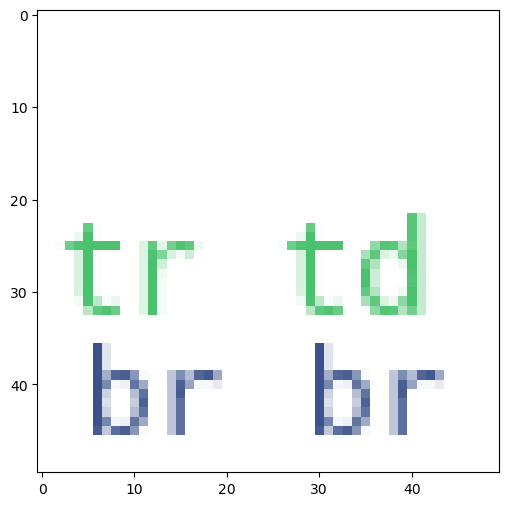

In [43]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [44]:
notspam_wc=wc.generate(df[df['category']==0]['transformed_text'].str.cat(sep=" "))

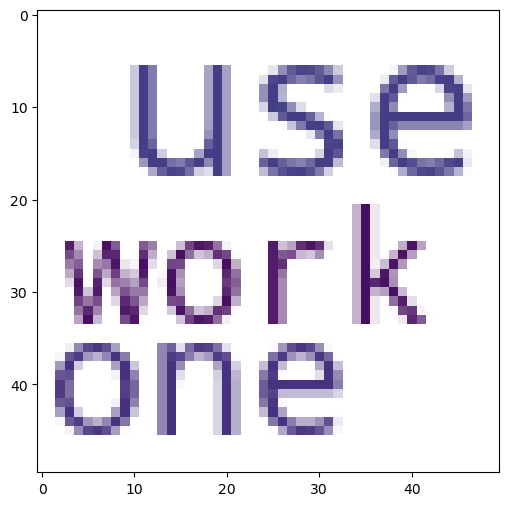

In [45]:
plt.figure(figsize=(15,6))
plt.imshow(notspam_wc)

In [46]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [47]:
x=cv.fit_transform(df['transformed_text']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [48]:
x.shape

(3654, 33785)

In [49]:
y=df['category'].values
y

array([0, 0, 0, ..., 1, 1, 1])

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [52]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [53]:
gnb=GaussianNB()
mnb=MultinomialNB
bnb=BernoulliNB

In [54]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9001367989056087
[[353  15]
 [ 58 305]]
0.953125


In [55]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()     # <-- create model again
mnb.fit(x_train, y_train)

y_pred2 = mnb.predict(x_test)

print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))


0.9466484268125855
[[364   4]
 [ 35 328]]
0.9879518072289156


In [56]:
from sklearn.naive_bayes import BernoulliNB

bnb=BernoulliNB()   # <-- create model again
bnb.fit(x_train, y_train)

y_pred3 =bnb.predict(x_test)

print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))


0.86593707250342
[[364   4]
 [ 94 269]]
0.9853479853479854


In [57]:
import pickle
pickle.dump(tfidf,open('vectorize_pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
import pickle

tfidf = TfidfVectorizer(max_features=33785)
corpus = df['email']   # or df['text']

X = tfidf.fit_transform(corpus)

model = MultinomialNB()
model.fit(X, y)

pickle.dump(tfidf, open("vectorizer.pkl", "wb"))
pickle.dump(model, open("model.pkl", "wb"))


In [59]:
print("NumPy version   :", np.__version__)
print("Pandas version :", pd.__version__)


NumPy version   : 2.1.3
Pandas version : 2.2.3
